Web Data Applications - BD2A NOITE
AC2 - Feminicídio

Gregory Henrique   RA: 2202566
Leonardo Goia Konigame  RA: 2202461
Myke Wellington  RA: 2202511
Rebeca Cleto  RA: 2203471
Kevyn Alexsander Machado Klen da Silva  RA: 2202760

In [1]:
import selenium
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service

In [2]:
navegador = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

In [3]:
navegador.get('https://www.ssp.sp.gov.br/transparenciassp/Consulta2022.aspx')

In [4]:
navegador.find_element(By.XPATH, '//*[@id="cphBody_btnFeminicidio"]').click() # encontrando um elemento para clicar
#navegador.find_element(By.ID, 'cphBody_btnFeminicidio').click() # encontrando um elemento para clicar

----------------------------------------------------------------------------------------------------------------------

In [6]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib as mlp
import seaborn as sns
import plotly.express as px

In [14]:
#Importar o arquivo CSV
dados = pd.read_csv('../1_bases_originais/Feminicidio_2015_2022.csv', sep = ';', encoding = 'utf-8')

In [15]:
#Verificar tamanho da tabela
dados.shape

(195, 31)

In [16]:
#Verificar duplicados
dados.duplicated().sum()

0

In [17]:
#Mostrar título das colunas
dados.columns

Index(['DEPARTAMENTO_CIRCUNSCRICAO', 'SECCIONAL_CIRCUNSCRICAO',
       'MUNICIPIO_CIRCUNSCRICAO', 'DP_CIRCUNSCRICAO ', 'HD', 'Nº DE VÍT HD',
       'ID_DELEGACIA', 'MÊS ESTATISTICA', 'ANO ESTATISTICA',
       'DATAHORA_REGISTRO_BO', 'NUM_BO', 'ANO_BO', 'MUNICIPIO_ELABORACAO',
       'DP_ELABORACAO', 'SEC_ELABORACAO', 'DEP_ELABORACAO', 'DATA_FATO',
       'HORA_FATO', 'DESC_TIPOLOCAL', 'LOGRADOURO', 'NUMERO_LOGRADOURO',
       'LATITUDE', 'LONGITUDE', 'TIPO_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA',
       'DATA_NASCIMENTO_PESSOA', 'COR_PELE', 'PROFISSAO', 'NATUREZA_APURADA',
       'DESDOBRAMENTO'],
      dtype='object')

In [22]:
#Retirar colunas sem relevância
dados = dados.drop(columns=['HD','NUMERO_LOGRADOURO','NATUREZA_APURADA','DESDOBRAMENTO','LATITUDE','LONGITUDE'])

In [23]:
#Padronizar e tratar título das colunas

#trocar espaços por underline
dados.columns = dados.columns.str.replace(' ', '_')

In [24]:
#colocar em letras minúsculas
dados.columns = dados.columns.str.lower()

In [25]:
#Mostrar título das colunas depois do tratamento
dados.columns

Index(['departamento_circunscricao', 'seccional_circunscricao',
       'municipio_circunscricao', 'dp_circunscricao_', 'nº_de_vít_hd',
       'id_delegacia', 'mês_estatistica', 'ano_estatistica',
       'datahora_registro_bo', 'num_bo', 'ano_bo', 'municipio_elaboracao',
       'dp_elaboracao', 'sec_elaboracao', 'dep_elaboracao', 'data_fato',
       'hora_fato', 'desc_tipolocal', 'logradouro', 'tipo_pessoa',
       'sexo_pessoa', 'idade_pessoa', 'data_nascimento_pessoa', 'cor_pele',
       'profissao'],
      dtype='object')

In [62]:
dados.shape

(195, 25)

In [26]:
#Substituir caracteres especiais de toda a base de dados
dados = dados.replace({'á':'a','ã':'a', 'â':'a', 'í':'i',
                ";" :".",
                "," :".",
                'ÅŸ':'s',
                'Ä°':'I',
                'Ä±':'i',
                'Ã¶':'o',
                'Ã§':'c',
                'ÄŸ':'g',
                'Ã¼':'u',
                'Ã©':'e',
                'Ã¡':'a',
                'Ã³':'o',
                'Ã±':'nh',
                '&':'',
                'Ã…Ë†':'n',
                'Ã§':'c',
                ' ':'',
                'Ã­':'i',
                'Ã£':'a',
                'Ãº':'u',
                'Ã':'a',
                'Ãª':'e',
                'Ã‘':'N',
                'aÂ¢':'a',
                'aÂª':'e',
                'aÂ':'a',
                "á":"a",
                "é":"e",
                "í":"i",
                "ó":"o",
                "ú":"u",
                "ã":"a",
                "õ":"o",
                "aª":"e",
                "á":"a",
                "é":"e",
                "í":"i",
                "ó":"o",
                "ú":"u",
                "ã":"a",
                "õ":"o",
                "ê":"e",
                "â":"a",
                "ô":"o",
                "ê":"e",
                "â":"a",
                "ô":"o"              
              
              }, regex=True)

In [27]:
dados.isnull().sum()

departamento_circunscricao      0
seccional_circunscricao         0
municipio_circunscricao         0
dp_circunscricao_               0
nº_de_vít_hd                    0
id_delegacia                    0
mês_estatistica                 0
ano_estatistica                 0
datahora_registro_bo            0
num_bo                          0
ano_bo                          0
municipio_elaboracao            0
dp_elaboracao                   0
sec_elaboracao                  0
dep_elaboracao                  0
data_fato                       0
hora_fato                       0
desc_tipolocal                  0
logradouro                      0
tipo_pessoa                     0
sexo_pessoa                     0
idade_pessoa                    1
data_nascimento_pessoa          1
cor_pele                        0
profissao                     115
dtype: int64

In [28]:
dados.duplicated().sum()

0

Analisando e tratando Missingno

<Axes: >

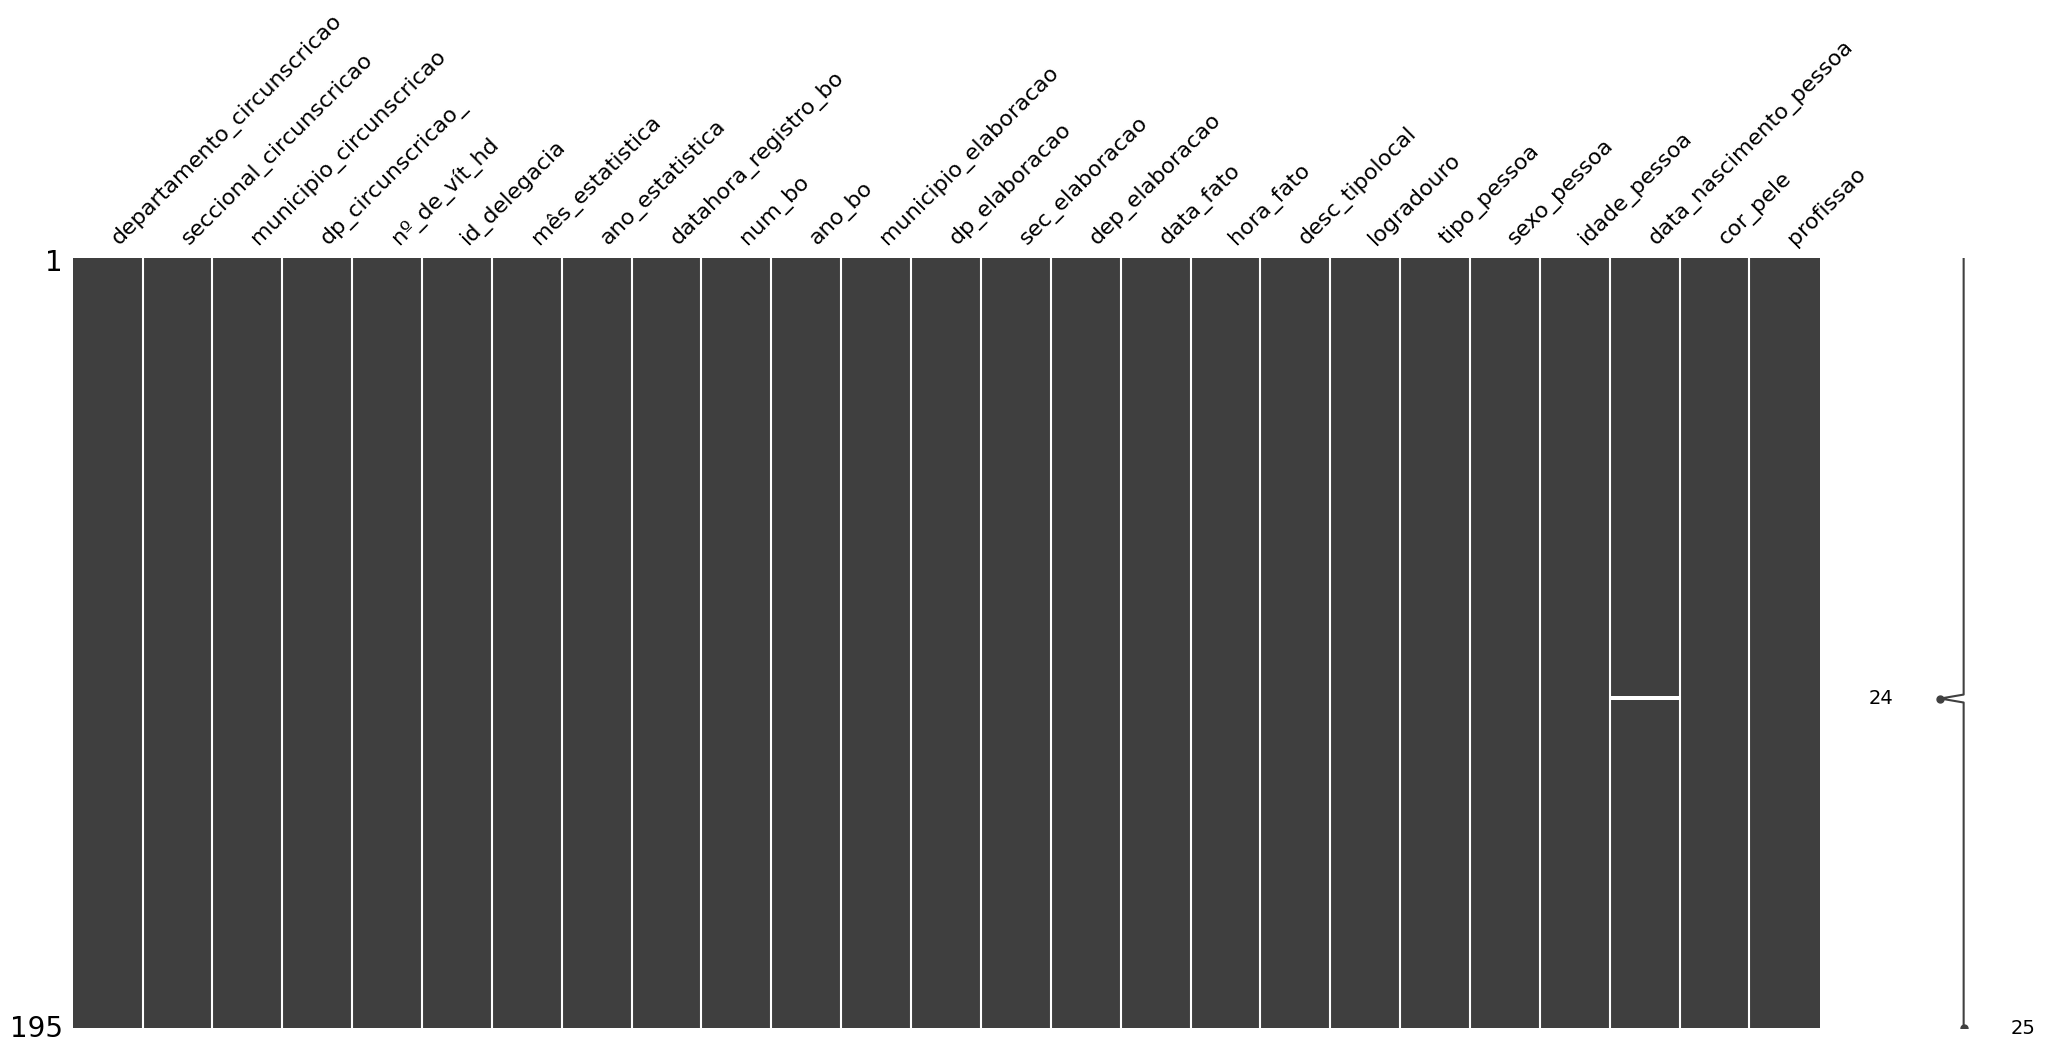

In [42]:
import missingno as msno
msno.matrix(dados)
#A matrix mostra que somente uma linha apresentou dados nulos nas colunas ('idade_pessoa' e 'data_nascimento_pessoa')
#Na coluna 'profissao' apresentou varios dados com informação faltando

In [31]:
dados.profissao.value_counts()

PRENDASDOMESTICAS            11
OUTROS                        9
AUXILIARDELIMPEZA             7
CABELEIREIRO(A)               4
NAOINFORMADA                  4
DESEMPREGADO                  3
FAXINEIRO(A)                  3
DESEMPREGADO(A)               3
APOSENTADO(A)                 3
EMPREGADODOMESTICO            2
COZINHEIRO(A)                 2
AUTONOMO(A)                   2
ESTUDANTE                     2
MANICURE                      2
POLICIALMILITAR               1
TECNICO(A)                    1
VENDEDOR(A)                   1
AUXILIARADMINISTRATIVO        1
MODELISTA                     1
ATENDENTE                     1
ATENDENTEDETELEMARKETING      1
FISCAL                        1
VIGILANTE                     1
SEGURANCA                     1
AUXILIARDESERVIÇOSGERAIS      1
CATADORMATERIALRECICLAVEL     1
TECNICOEMENFERMAGEM           1
ANALISTA                      1
COMERCIANTE                   1
GARÇON(ETE)                   1
AJUDANTEDECOZINHA             1
EMBALADO

In [32]:
#subistituindo dados nulos por uma informação em string
dados.profissao.fillna("Não informado",inplace=True)

In [34]:
dados.idade_pessoa.value_counts()

34.0    10
26.0     9
35.0     8
33.0     8
27.0     8
31.0     8
39.0     7
28.0     7
29.0     7
41.0     6
52.0     6
42.0     6
36.0     6
22.0     5
40.0     5
38.0     5
37.0     5
25.0     4
45.0     4
23.0     4
46.0     4
30.0     3
32.0     3
21.0     3
43.0     3
49.0     3
58.0     3
55.0     3
47.0     3
54.0     3
19.0     3
48.0     2
62.0     2
63.0     2
71.0     2
18.0     2
59.0     2
24.0     2
44.0     2
11.0     1
80.0     1
20.0     1
13.0     1
57.0     1
77.0     1
65.0     1
61.0     1
51.0     1
3.0      1
81.0     1
5.0      1
6.0      1
1.0      1
50.0     1
2.0      1
Name: idade_pessoa, dtype: int64

In [54]:
dados.idade_pessoa.median()

35.0

In [35]:
dados.idade_pessoa.fillna(dados.idade_pessoa.median(), inplace=True)

In [48]:
dados.data_nascimento_pessoa.fillna(21/12/1986, inplace=True)

In [56]:
dados.isnull().sum()

departamento_circunscricao    0
seccional_circunscricao       0
municipio_circunscricao       0
dp_circunscricao_             0
nº_de_vít_hd                  0
id_delegacia                  0
mês_estatistica               0
ano_estatistica               0
datahora_registro_bo          0
num_bo                        0
ano_bo                        0
municipio_elaboracao          0
dp_elaboracao                 0
sec_elaboracao                0
dep_elaboracao                0
data_fato                     0
hora_fato                     0
desc_tipolocal                0
logradouro                    0
tipo_pessoa                   0
sexo_pessoa                   0
idade_pessoa                  0
data_nascimento_pessoa        0
cor_pele                      0
profissao                     0
dtype: int64

<Axes: >

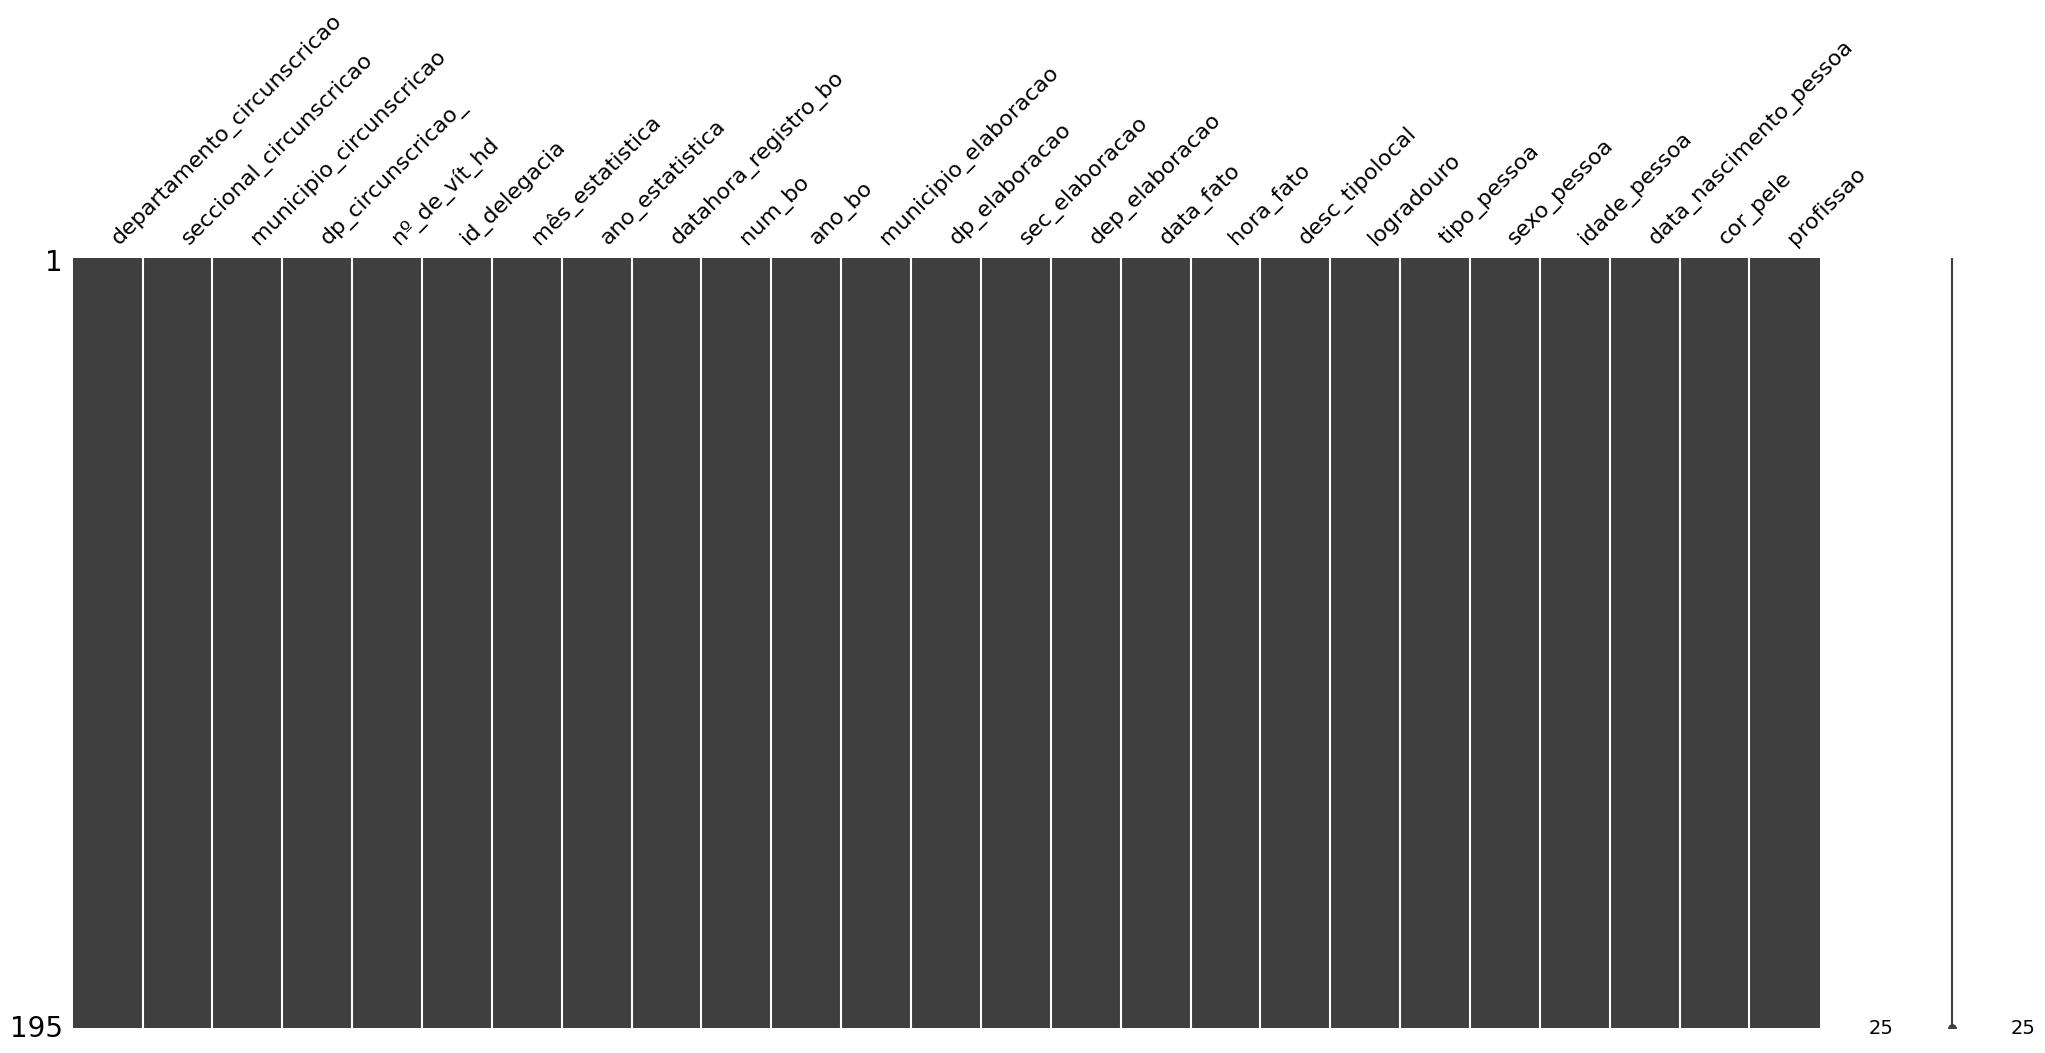

In [49]:
msno.matrix(dados)

In [50]:
dados.isnull().sum()

departamento_circunscricao    0
seccional_circunscricao       0
municipio_circunscricao       0
dp_circunscricao_             0
nº_de_vít_hd                  0
id_delegacia                  0
mês_estatistica               0
ano_estatistica               0
datahora_registro_bo          0
num_bo                        0
ano_bo                        0
municipio_elaboracao          0
dp_elaboracao                 0
sec_elaboracao                0
dep_elaboracao                0
data_fato                     0
hora_fato                     0
desc_tipolocal                0
logradouro                    0
tipo_pessoa                   0
sexo_pessoa                   0
idade_pessoa                  0
data_nascimento_pessoa        0
cor_pele                      0
profissao                     0
dtype: int64

<Axes: >

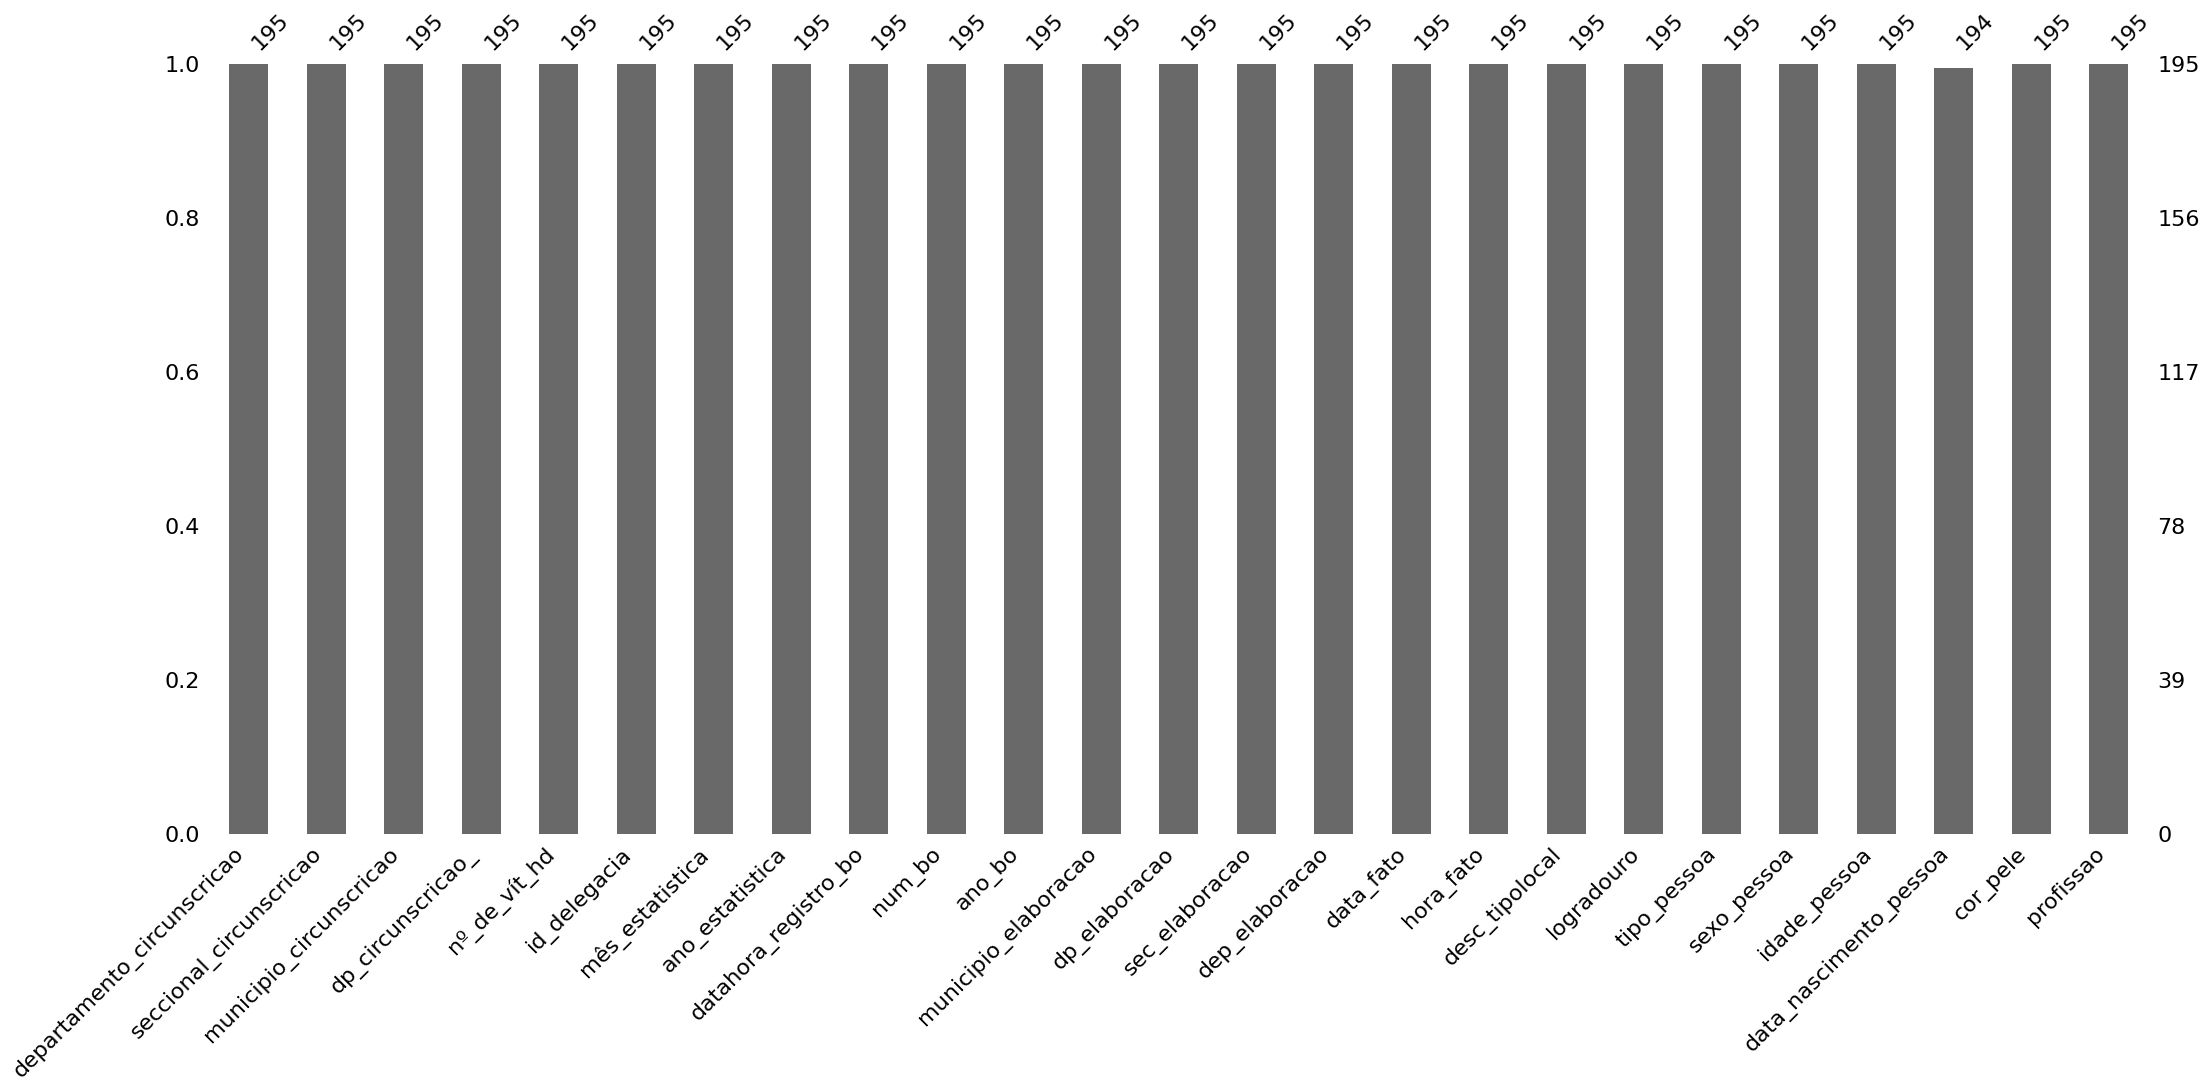

In [36]:
msno.bar(dados)

c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

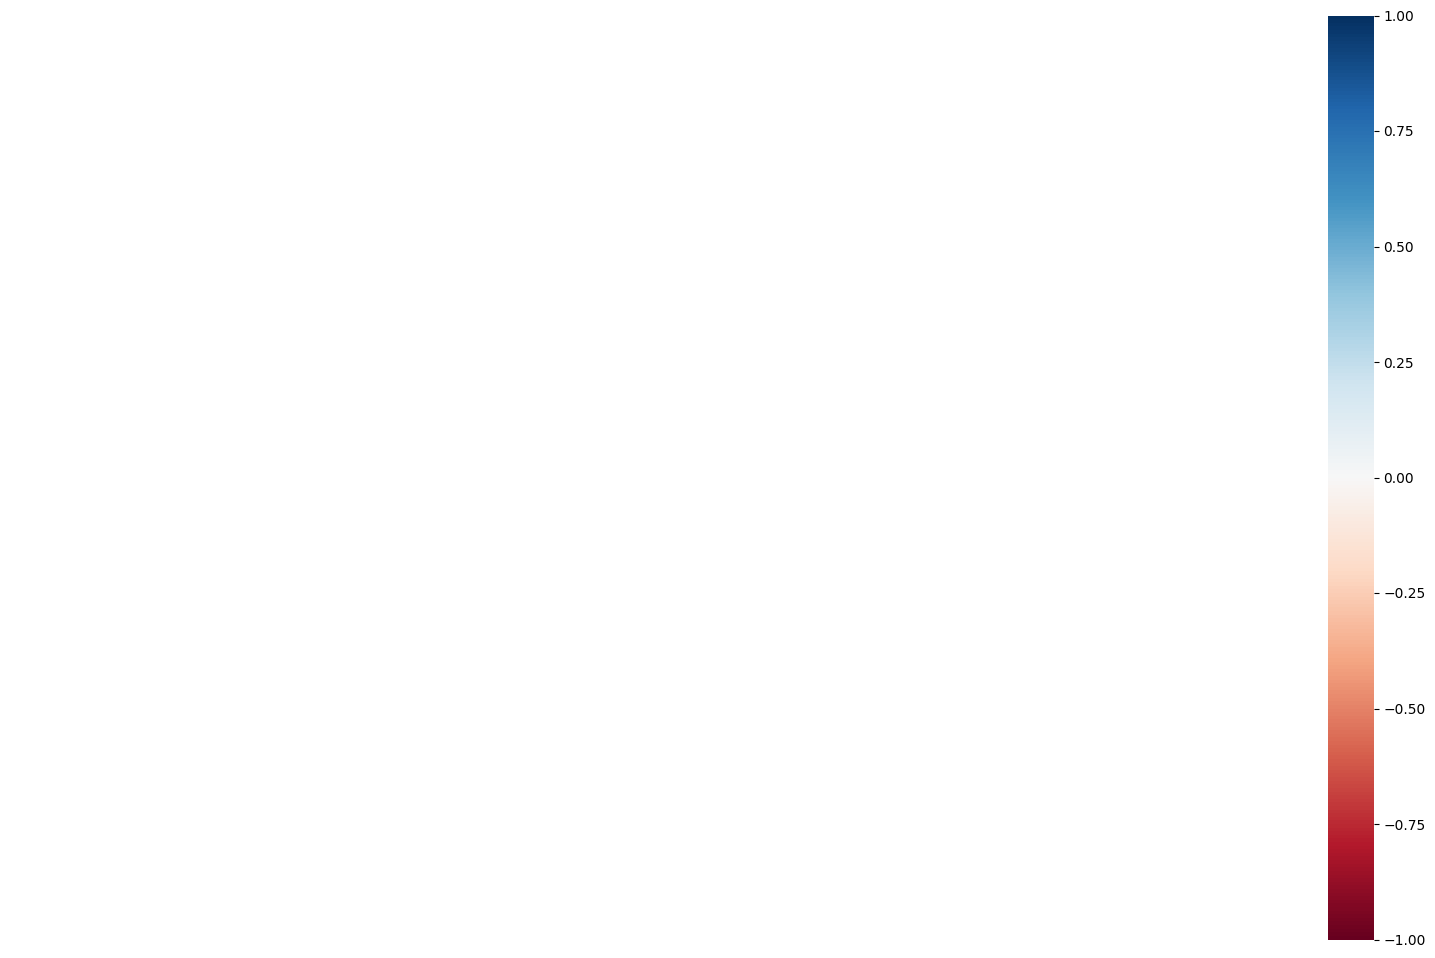

In [51]:
msno.heatmap(dados)
#O mapa mostra que existe uma forte correlação entre a data de nascimento e a idade da pessoa nos dados faltantes
#e apresentou uma baixa correlação entre a profissão e as demais informações.

c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\cluster\hierarchy.py:2848: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Axes: >

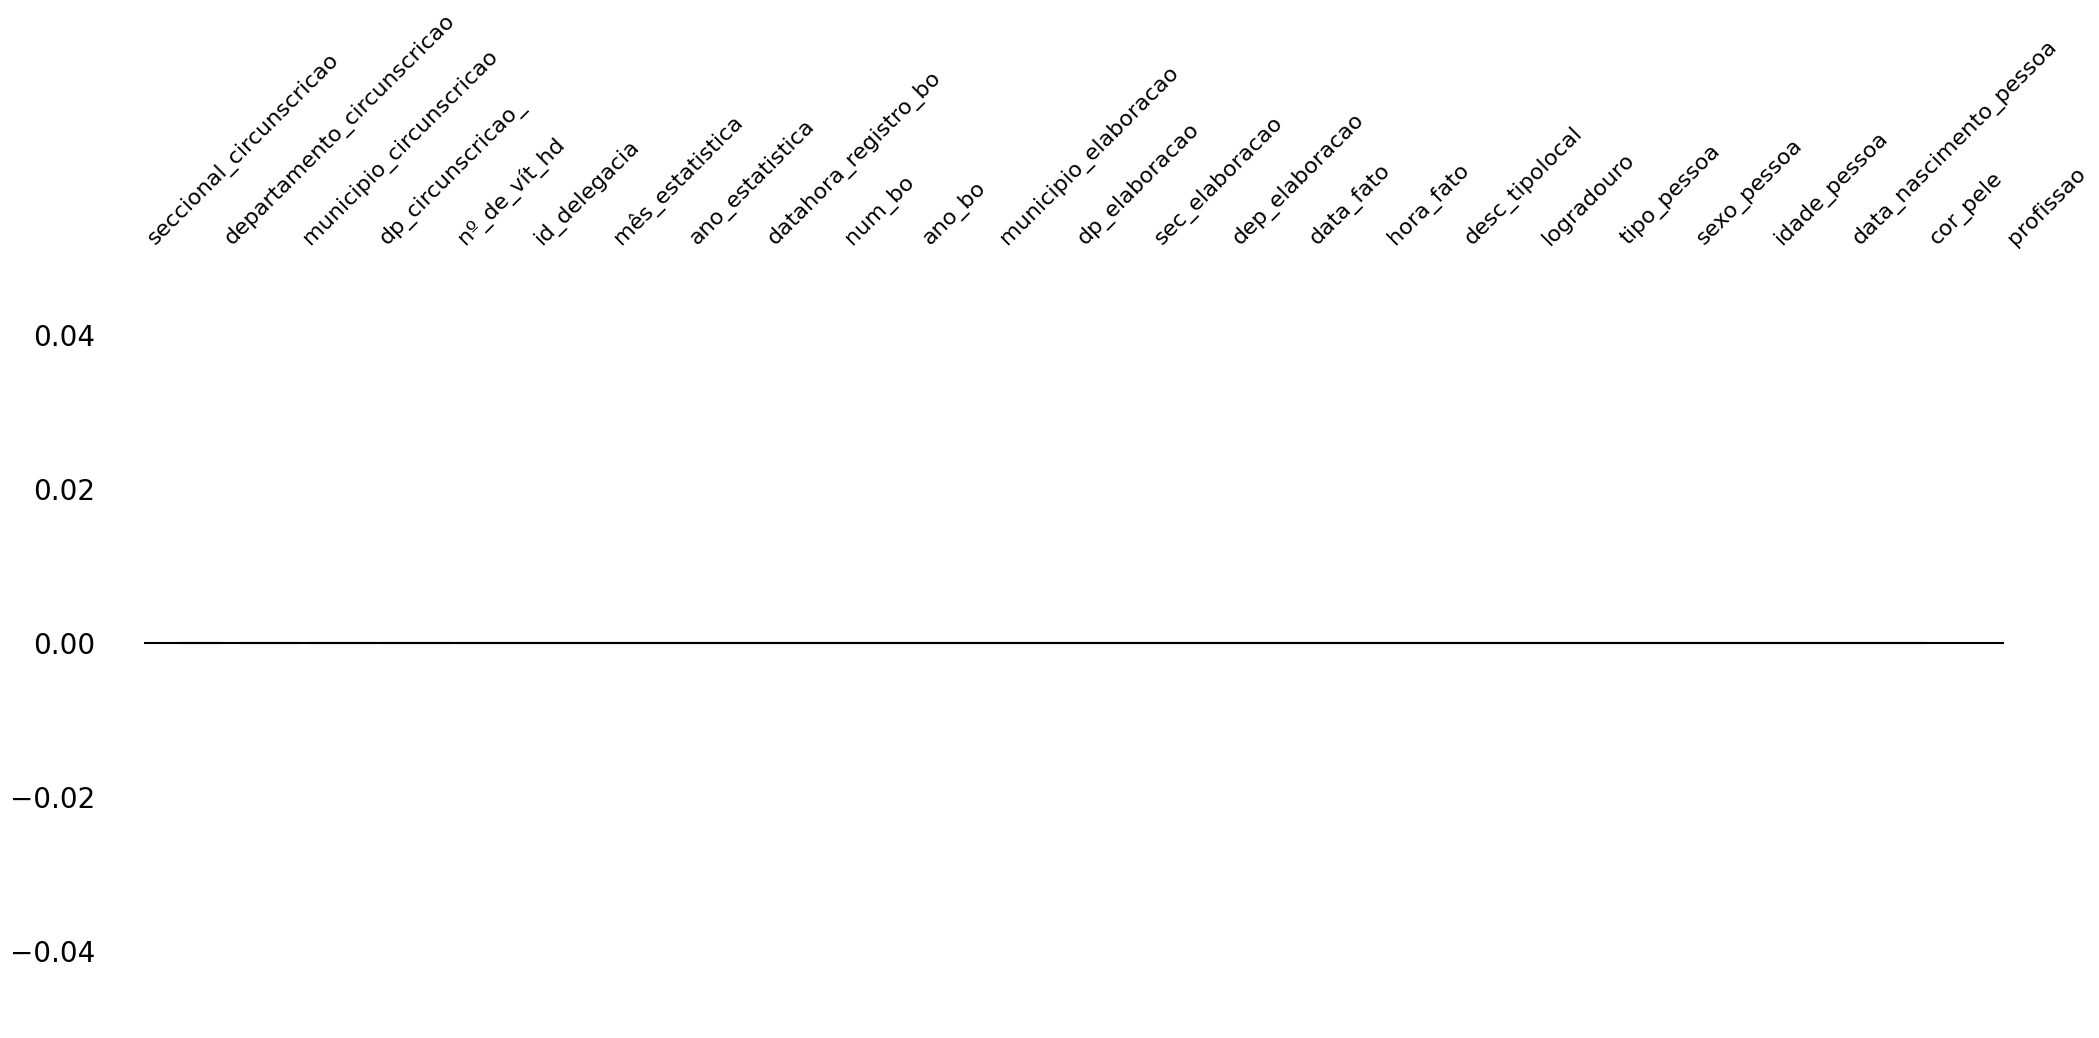

In [52]:
msno.dendrogram(dados)
#O dendograma mostra que os dados perdidos foram agrupados em 3 clusters onde a maior parte das colunas estão
#com todas informações completas, 2 colunas com uma informação faltante ('idade_pessoa', 'data_nascimento_pessoa')
#e a coluna 'profissão' com varias informações NULL

In [53]:
dados.cor_pele.value_counts()

Branca      106
Parda        75
Preta        11
Ignorada      2
Amarela       1
Name: cor_pele, dtype: int64

In [60]:
dados.idade_pessoa.describe()

count    195.000000
mean      36.441026
std       13.894683
min        0.000000
25%       27.500000
50%       35.000000
75%       43.500000
max       81.000000
Name: idade_pessoa, dtype: float64

In [59]:

#Ele coloca as pessoas maiores de 65 anos de idade e menores de 5 anos como outliers

px.box(dados.idade_pessoa)

In [63]:
dados.to_csv('../2_bases_tratadas/base_tratada.csv', sep=';', encoding='utf-8', index=False)